In [ ]:
#INSTALACIÓN DE LIBRERIAS
!pip install Torch==1.8.1
!pip install TorchVision

In [ ]:
#IMPORTS
import os
import shutil
import cv2

In [1]:
import pickle
import random

ruta_train = 'C:\\Users\\Angel\\Downloads\\IDC_train.dat'
ruta_test = 'C:\\Users\\Angel\\Downloads\\IDC_test.dat'

# Cargar el archivo de entrenamiento
with open(ruta_train, 'rb') as f:
    (X_train, y_train) = pickle.load(f)

# Cargar el archivo de prueba
with open(ruta_test, 'rb') as f:
    (X_test, y_test) = pickle.load(f)

# Obtener el 30% de los datos de entrenamiento
total_samples_train = len(X_train)
num_samples_train = int(0.3 * total_samples_train)
random_indices_train = random.sample(range(total_samples_train), num_samples_train)
X_train = [X_train[i] for i in random_indices_train]
y_train = [y_train[i] for i in random_indices_train]

# Obtener el 30% de los datos de prueba
total_samples_test = len(X_test)
num_samples_test = int(0.3 * total_samples_test)
random_indices_test = random.sample(range(total_samples_test), num_samples_test)
X_test = [X_test[i] for i in random_indices_test]
y_test = [y_test[i] for i in random_indices_test]

# Realizar cualquier otra operación necesaria con los datos cargados


In [5]:
print(len(X_test))

16651


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test = np.array(X_train), np.array(X_test)
# Reshape para que las imágenes sean 2D
X_train_2d = X_train.reshape(len(X_train), -1)
X_test_2d = X_test.reshape(len(X_test), -1)

# Aplicar el escalado a los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Reshape de nuevo a las dimensiones originales de las imágenes
X_train_scaled = X_train_scaled.reshape(len(X_train), *X_train.shape[1:])
X_test_scaled = X_test_scaled.reshape(len(X_test), *X_test.shape[1:])

# Realizar cualquier otra operación necesaria con los conjuntos escalados (X_train_scaled, X_test_scaled)


In [9]:
print(X_train_scaled[0])

[[[0.83003953 0.76078431 0.90873016]
  [0.86561265 0.79527559 0.92063492]
  [0.90909091 0.8627451  0.92857143]
  ...
  [0.69565217 0.55555556 0.73412698]
  [0.71146245 0.60474308 0.84920635]
  [0.66135458 0.52362205 0.85258964]]

 [[0.71825397 0.58823529 0.78571429]
  [0.71031746 0.62745098 0.80478088]
  [0.73517787 0.64705882 0.85258964]
  ...
  [0.68379447 0.56299213 0.83730159]
  [0.74501992 0.61023622 0.86904762]
  [0.67193676 0.56349206 0.84920635]]

 [[0.66007905 0.50980392 0.68650794]
  [0.77777778 0.65882353 0.78174603]
  [0.65217391 0.50196078 0.63888889]
  ...
  [0.73015873 0.6284585  0.8531746 ]
  [0.72619048 0.61660079 0.87250996]
  [0.67460317 0.52964427 0.83665339]]

 ...

 [[0.92063492 0.92125984 0.92460317]
  [0.93650794 0.90980392 0.91666667]
  [0.93253968 0.91372549 0.91269841]
  ...
  [0.65612648 0.53937008 0.8531746 ]
  [0.72727273 0.61417323 0.84126984]
  [0.68379447 0.55905512 0.82936508]]

 [[0.94071146 0.92941176 0.92460317]
  [0.92094862 0.90588235 0.92857143]


Using 10 neurons
CREAR MODELO 10
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0001_10.pth
Epoch: 1, Accuracy: 0.8283586571377094, Loss: 0.4393215352577638
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0002_10.pth
Epoch: 2, Accuracy: 0.8374872380037235, Loss: 0.395422631540797
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0003_10.pth
Epoch: 3, Accuracy: 0.8403699477508858, Loss: 0.3794588450903923
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0004_10.pth
Epoch: 4, Accuracy: 0.8352651492402858, Loss: 0.36829383165760543
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0005_10.pth
Epoch: 5, Accuracy: 0.8239745360639, Loss: 0.3579743706677576
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0006_10.pth
Epoch: 6, Accuracy: 0.8479971172902528, Loss: 0.34886694110923255
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0007_10.pth
Epoch: 7, Accuracy: 0.8528016335355234, Loss: 0.3429686898736692
Saved checkpoint 

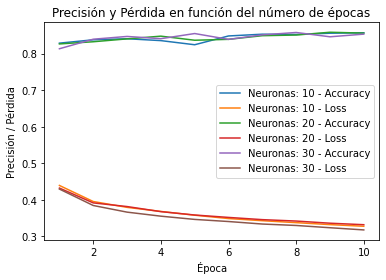

Best Accuracy: 0.8581466578583868
Best Parameters: {'num_neurons': 20}


In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train_scaled, y_train)
test_dataset = CustomDataset(X_test_scaled, y_test)

# Define the model architecture
class Model(nn.Module):
    def __init__(self, num_neurons):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, num_neurons, 3) 
        self.conv2 = nn.Conv2d(num_neurons, num_neurons*2, 3) 
        self.conv3 = nn.Conv2d(num_neurons*2, num_neurons*4, 3)
        self.conv4 = nn.Conv2d(num_neurons*4, num_neurons*8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(num_neurons*8, num_neurons)  # Assumes that after four convolutions and max pooling, the dimension is num_neurons * 8 * 3 * 3
        self.fc2 = nn.Linear(num_neurons, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Define the function to create the model
def crear_modelo(num_neurons):
    print("CREAR MODELO", num_neurons)
    model = Model(num_neurons)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters())
    return model, criterion, optimizer

# Define the checkpoint directory
checkpoint_dir = 'D:/Master/TFM/Checkpoints'

# Create checkpoint directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

def save_ckpt(model, optimizer, epoch, num_neurons, checkpoint_dir):
    save_dir = os.path.join(checkpoint_dir, "checkpoint_{:04d}_{}.pth".format(epoch, num_neurons))

    cp = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch,
    }

    torch.save(cp, save_dir)
    print("Saved checkpoint into {}".format(save_dir))


def load_ckpt(checkpoint_dir, num_neurons):
    last_epoch = 0
    checkpoint_file = ''

    for file in os.listdir(checkpoint_dir):
        if file.endswith('{}.pth'.format(num_neurons)):
            epoch_number = int(file.split('_')[1])
            if epoch_number > last_epoch:
                last_epoch = epoch_number
                checkpoint_file = file

    if last_epoch == 0:
        return None, 0
    else:
        print("Loaded checkpoint", os.path.join(checkpoint_dir, checkpoint_file))
        checkpoint = torch.load(os.path.join(checkpoint_dir, checkpoint_file))
        return checkpoint, checkpoint['epoch']

# Define the grid of parameters
param_grid = {
    'num_neurons': [10, 20, 30],
}

# Perform grid search
best_accuracy = 0.0
best_params = None
accuracies = []
losses = []

for params in ParameterGrid(param_grid):
    print("Using {} neurons".format(params['num_neurons']))
    model, criterion, optimizer = crear_modelo(params['num_neurons'])
    checkpoint, start_epoch = load_ckpt(checkpoint_dir, params['num_neurons'])
    if checkpoint is not None:
        model.load_state_dict(checkpoint['model'])
        optimizer.load_state_dict(checkpoint['optimizer'])

    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    
    epoch_nums = []
    epoch_accuracies = []
    epoch_losses = []
    
    for epoch in range(start_epoch, start_epoch + 10):
        model.train()
        epoch_loss = 0.0  # Variable para almacenar la pérdida acumulada de la época actual
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs = inputs.permute((0,3,1,2))
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()  # Acumular la pérdida de cada batch en la época actual
            
        epoch_losses.append(epoch_loss / len(train_loader))  # Guardar la pérdida promedio de la época actual

        save_ckpt(model, optimizer, epoch + 1, params['num_neurons'], checkpoint_dir) # Save the checkpoint

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.permute((0,3,1,2))
                outputs = model(inputs)
                predicted = (outputs >= 0.5).squeeze().long()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        epoch_nums.append(epoch + 1)
        epoch_accuracies.append(accuracy)
        print("Epoch: {}, Accuracy: {}, Loss: {}".format(epoch + 1, accuracy, epoch_losses[-1]))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
    
    # Guardar las precisiones y pérdidas del modelo actual
    accuracies.append(epoch_accuracies)
    losses.append(epoch_losses)

# Graficar las precisiones y pérdidas por modelo
for i, params in enumerate(ParameterGrid(param_grid)):
    plt.plot(epoch_nums, accuracies[i], label='Neuronas: {} - Accuracy'.format(params['num_neurons']))
    plt.plot(epoch_nums, losses[i], label='Neuronas: {} - Loss'.format(params['num_neurons']))

plt.xlabel('Época')
plt.ylabel('Precisión / Pérdida')
plt.title('Precisión y Pérdida en función del número de épocas')
plt.legend()
plt.show()

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)


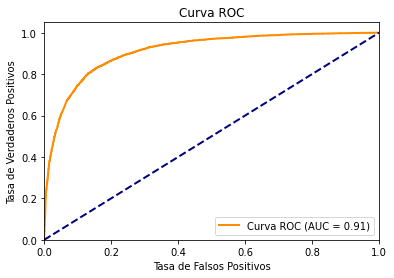

In [36]:
# Obtén las predicciones del mejor modelo
best_model = Model(best_params['num_neurons'])
best_model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "checkpoint_0009_20.pth"))['model'])
best_model.eval()

y_pred = []
y_true = []

with torch.no_grad():
    inputs = torch.from_numpy(X_test_scaled).permute(0, 3, 1, 2).type(torch.FloatTensor)
    outputs = best_model(inputs)
    predicted = outputs.squeeze().numpy()
    y_pred.extend(predicted.tolist())
    y_true.extend(y_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [37]:
# Crear el modelo con los mejores parámetros
best_model = Model(best_params['num_neurons'])
best_model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "checkpoint_0009_20.pth"))['model'])
best_model.eval()

# Obtener las predicciones del mejor modelo
inputs = torch.from_numpy(X_test_scaled).permute(0, 3, 1, 2).type(torch.FloatTensor)
with torch.no_grad():
    outputs = best_model(inputs)
    predicted = (outputs >= 0.5).squeeze().long()
    predictions = predicted.tolist()

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[11028   910]
 [ 1452  3261]]


Using 10 neurons
CREAR MODELO 10
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0001_10.pth
Epoch: 1, Accuracy: 0.8104618341240767, Loss: 0.4308998080353858
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0002_10.pth
Epoch: 2, Accuracy: 0.8443937301062999, Loss: 0.38386711825427483
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0003_10.pth
Epoch: 3, Accuracy: 0.8486577382739775, Loss: 0.37060060651295895
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0004_10.pth
Epoch: 4, Accuracy: 0.8469761575881328, Loss: 0.3608337581079946
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0005_10.pth
Epoch: 5, Accuracy: 0.8473364963065282, Loss: 0.35577830645782715
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0006_10.pth
Epoch: 6, Accuracy: 0.8564050207194763, Loss: 0.3496062637084021
Saved checkpoint into D:/Master/TFM/Checkpoints\checkpoint_0007_10.pth
Epoch: 7, Accuracy: 0.8516005044742058, Loss: 0.34247807568984157
Saved check

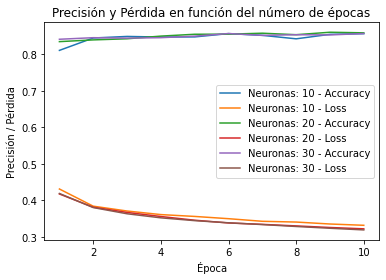

Best Accuracy: 0.860128520809561
Best Parameters: {'num_neurons': 20}


In [48]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train_scaled, y_train)
test_dataset = CustomDataset(X_test_scaled, y_test)

class Model(nn.Module):
    def __init__(self, num_neurons):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, num_neurons, 3) 
        self.conv2 = nn.Conv2d(num_neurons, num_neurons*2, 3) 
        self.conv3 = nn.Conv2d(num_neurons*2, num_neurons*4, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(num_neurons*8*8, num_neurons)  # Ajustar el tamaño de entrada de acuerdo a las salidas de las capas anteriores
        self.fc2 = nn.Linear(num_neurons, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.reshape(x.size(0), -1)  # Cambiar la forma a un tensor de tamaño batch_size x (num_neurons*4*3*3)
        x = F.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Define the function to create the model
def crear_modelo(num_neurons):
    print("CREAR MODELO", num_neurons)
    model = Model(num_neurons)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters())
    return model, criterion, optimizer

# Define the checkpoint directory
checkpoint_dir = 'D:/Master/TFM/Checkpoints'

# Create checkpoint directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

def save_ckpt(model, optimizer, epoch, num_neurons, checkpoint_dir):
    save_dir = os.path.join(checkpoint_dir, "checkpoint_{:04d}_{}.pth".format(epoch, num_neurons))

    cp = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch,
    }

    torch.save(cp, save_dir)
    print("Saved checkpoint into {}".format(save_dir))


def load_ckpt(checkpoint_dir, num_neurons):
    last_epoch = 0
    checkpoint_file = ''

    for file in os.listdir(checkpoint_dir):
        if file.endswith('{}.pth'.format(num_neurons)):
            epoch_number = int(file.split('_')[1])
            if epoch_number > last_epoch:
                last_epoch = epoch_number
                checkpoint_file = file

    if last_epoch == 0:
        return None, 0
    else:
        print("Loaded checkpoint", os.path.join(checkpoint_dir, checkpoint_file))
        checkpoint = torch.load(os.path.join(checkpoint_dir, checkpoint_file))
        return checkpoint, checkpoint['epoch']

# Define the grid of parameters
param_grid = {
    'num_neurons': [10, 20, 30],
}

# Perform grid search
best_accuracy = 0.0
best_params = None
accuracies = []
losses = []

for params in ParameterGrid(param_grid):
    print("Using {} neurons".format(params['num_neurons']))
    model, criterion, optimizer = crear_modelo(params['num_neurons'])
    checkpoint, start_epoch = load_ckpt(checkpoint_dir, params['num_neurons'])
    if checkpoint is not None:
        model.load_state_dict(checkpoint['model'])
        optimizer.load_state_dict(checkpoint['optimizer'])

    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    
    epoch_nums = []
    epoch_accuracies = []
    epoch_losses = []
    
    for epoch in range(start_epoch, start_epoch + 10):
        model.train()
        epoch_loss = 0.0  # Variable para almacenar la pérdida acumulada de la época actual
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs = inputs.permute((0,3,1,2))
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()  # Acumular la pérdida de cada batch en la época actual
            
        epoch_losses.append(epoch_loss / len(train_loader))  # Guardar la pérdida promedio de la época actual

        save_ckpt(model, optimizer, epoch + 1, params['num_neurons'], checkpoint_dir) # Save the checkpoint

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.permute((0,3,1,2))
                outputs = model(inputs)
                predicted = (outputs >= 0.5).squeeze().long()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        epoch_nums.append(epoch + 1)
        epoch_accuracies.append(accuracy)
        print("Epoch: {}, Accuracy: {}, Loss: {}".format(epoch + 1, accuracy, epoch_losses[-1]))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
    
    # Guardar las precisiones y pérdidas del modelo actual
    accuracies.append(epoch_accuracies)
    losses.append(epoch_losses)

# Graficar las precisiones y pérdidas por modelo
for i, params in enumerate(ParameterGrid(param_grid)):
    plt.plot(epoch_nums, accuracies[i], label='Neuronas: {} - Accuracy'.format(params['num_neurons']))
    plt.plot(epoch_nums, losses[i], label='Neuronas: {} - Loss'.format(params['num_neurons']))

plt.xlabel('Época')
plt.ylabel('Precisión / Pérdida')
plt.title('Precisión y Pérdida en función del número de épocas')
plt.legend()
plt.show()

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)


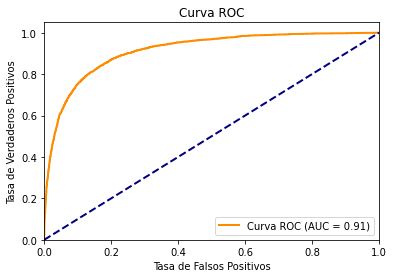

In [49]:
# Obtén las predicciones del mejor modelo
best_model = Model(best_params['num_neurons'])
best_model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "checkpoint_0009_20.pth"))['model'])
best_model.eval()

y_pred = []
y_true = []

with torch.no_grad():
    inputs = torch.from_numpy(X_test_scaled).permute(0, 3, 1, 2).type(torch.FloatTensor)
    outputs = best_model(inputs)
    predicted = outputs.squeeze().numpy()
    y_pred.extend(predicted.tolist())
    y_true.extend(y_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [50]:
# Crear el modelo con los mejores parámetros
best_model = Model(best_params['num_neurons'])
best_model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "checkpoint_0009_20.pth"))['model'])
best_model.eval()

# Obtener las predicciones del mejor modelo
inputs = torch.from_numpy(X_test_scaled).permute(0, 3, 1, 2).type(torch.FloatTensor)
with torch.no_grad():
    outputs = best_model(inputs)
    predicted = (outputs >= 0.5).squeeze().long()
    predictions = predicted.tolist()

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[11051   887]
 [ 1442  3271]]
